# PyTorch

파이토치(PyTorch) 는 페이스북(Meta)에서 개발한 파이썬 기반의 과학 연산 (scientific computing) 패키지로, 특히 딥러닝 분야에서 널리 사용됩니다. 파이토치는 직관적이고 유연한 코딩 방식 덕분에 전 세계 연구자와 개발자들이 가장 선호하는 라이브러리 중 하나입니다.

-  빠르고 강력한 GPU 연산 지원: 파이토치는 GPU를 활용하여 NumPy보다 훨씬 빠른 속도로 수치 계산을 수행합니다. 
-  최고의 유연성과 속도를 제공하는 딥러닝 연구 플랫폼

## 텐서(Tensors)

- 텐서(Tensor)는 파이토치에서 사용하는 가장 기본적인 데이터 구조입니다. 
- 텐서는 숫자, 벡터, 행렬을 비롯한 높은 차원의 데이터를 표현할 수 있는 다차원 배열 구조로, NumPy의 `ndarray`와 매우 비슷합니다.
- 파이토치 Tensor가 NumPy 배열과 구별되는 가장 큰 특징은 **GPU**와 같은 특수한 하드웨어를 활용해 연산 속도를 획기적으로 향상시킬 수 있다는 점입니다.

### Tensor Initialization

1. 초기화되지 않은 tensor 만들기

In [1]:
import torch
import numpy as np

In [2]:
x = torch.empty(5, 3)
print(x)
print(type(x))

tensor([[2.1019e-44, 1.6114e-19, 7.3148e-01],
        [3.0715e-41, 1.5737e-42, 1.1703e-19],
        [7.3151e-01, 3.0715e-41, 2.1019e-44],
        [7.5556e+31, 7.3149e-01, 3.0715e-41],
        [1.5751e-42, 1.3563e-19, 7.3151e-01]])
<class 'torch.Tensor'>


텐서의 속성 (Attributes of tensor)
- shape : 텐서 데이터 shape
- dtype : 개별 데이터의 자료형
- device : 어느 device (CPU/GPU)위에 있는지

In [3]:
print(f"Shape of tensor: {x.shape}")
print(f"Size of tensor: {x.size()}")     # same as shape()
print(f"Datatype of tensor: {x.dtype}")
print(f"Tensor is stored on device: {x.device}")

Shape of tensor: torch.Size([5, 3])
Size of tensor: torch.Size([5, 3])
Datatype of tensor: torch.float32
Tensor is stored on device: cpu


2. 랜덤하게 초기화된 텐서 만들기

In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.4396, 0.5938, 0.4607],
        [0.9227, 0.0612, 0.6620],
        [0.3554, 0.3452, 0.8574],
        [0.5427, 0.1818, 0.0397],
        [0.1553, 0.3748, 0.8884]])


3. 값이 0이고 `dtype`이 long인 텐서 만들기

In [5]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


4. 값이 1이고 dtype이 float16인 텐서 만들기

In [6]:
shape = (2,3,)
ones_tensor = torch.ones(shape, dtype = torch.float16)

print(f"Ones Tensor: \n {ones_tensor} \n")

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float16) 



5. 이미 존재하는 데이터로 부터 텐서 만들기

In [7]:
data = [[1, 2],[3, 4]]
x = torch.tensor(data)
print(x)

tensor([[1, 2],
        [3, 4]])


6. 기존 텐서를 바탕으로 새로운 텐서 생성하기

기존 텐서에서 원하는 속성만(e.g. dtype, size, device)을 변경하여 새로운 텐서를 손쉽게 생성할 수 있습니다. 이 함수들은 별도로 새로운 속성을 지정하지 않으면 원본 텐서의 속성을 그대로 재사용합니다.

활용 예시: Boolean 마스크(Mask) 텐서 생성하기
- 마스크(Mask)란 특정 조건을 만족하는 원소를 선택하거나 필터링할 때 사용하는 텐서로 원본 텐서와 같은 크기를 가지면서 각 위치의 값이 특정 조건을 만족하는지를 나타냄.

In [8]:
x = torch.tensor([[1.0, 2.0],[3.0, 4.0]])

x_rand = torch.rand_like(x)
print(f"Random Tensor: \n {x_rand} \n")     # size, dtype, device 모두 동일

x_ones = torch.ones_like(x, dtype = torch.int)    # override dtype
print(f"Ones Tensor: \n {x_ones} \n")       # size, device 동일

x_new_ones = x.new_ones(2, 3)      # override size
print(x_new_ones)                  # dtype, device 동일


Random Tensor: 
 tensor([[0.2938, 0.1465],
        [0.6292, 0.9393]]) 

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]], dtype=torch.int32) 

tensor([[1., 1., 1.],
        [1., 1., 1.]])


7. NumPy로 부터 tensor 생성하기

In [9]:
np_array = np.array([[1, 2],[3, 4]])
x = torch.from_numpy(np_array)
print(x)

tensor([[1, 2],
        [3, 4]])


Torch Tensor와 NumPy array는 메모리 위치를 공유합니다 (Torch Tensor가 CPU 위에 있는 경우)

따라서 둘중 하나의 값을 변경하면 다른것의 값도 변경됩니다.

In [10]:
np_array[1][1] = 100
print(f"numpy: \n{np_array}\n")
print(f"tensor: \n{x}")


numpy: 
[[  1   2]
 [  3 100]]

tensor: 
tensor([[  1,   2],
        [  3, 100]])


Torch 텐서를 NumPy 배열로 변환하는 것도 쉽습니다.
CPU에 위치한 모든 텐서는 NumPy와의 변환을 지원하며, CharTensor만 예외적으로 지원하지 않습니다.

In [11]:
tensor = torch.ones(3, 5)
print(tensor)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [12]:
array = tensor.numpy()
print(array)
print(type(array))

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
<class 'numpy.ndarray'>


In [13]:
tensor.add_(1)
print(tensor)
print(array)

tensor([[2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.],
        [2., 2., 2., 2., 2.]])
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]


## 텐서 연산 (Operations on tensors)

### 연산의 위치 (Operation locations)

`torch.Tensor`는 ``.to`` 메서드를 이용해 CPU → GPU 또는 GPU → CPU 등 다른 디바이스로 옮길 수 있습니다.

In [14]:
x = torch.rand(3,4)
if torch.cuda.is_available():
    x_gpu = x.to("cuda")
    
    print(f"Shape of tensor: {x_gpu.shape}")
    print(f"Datatype of tensor: {x_gpu.dtype}")
    print(f"Tensor is stored on device: {x_gpu.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Tensor is stored on device: cuda:0


GPU 위에 있는 텐서끼리는 연산을 할 수 있습니다

In [15]:
if torch.cuda.is_available():
    device = torch.device("cuda")           # a CUDA device object
    x_gpu = x.to(device)                    # or just use strings ``.to("cuda")``
    y_gpu = torch.ones_like(x_gpu)          # directly create a tensor on GPU
    z = x_gpu + y_gpu
    print(z)
    print(z.to("cpu", torch.float16))       # .to를 이용해 dtype도 같이 변환할 수 있다

tensor([[1.0315, 1.3575, 1.5085, 1.5400],
        [1.6626, 1.7317, 1.1896, 1.1918],
        [1.1873, 1.3812, 1.0931, 1.9373]], device='cuda:0')
tensor([[1.0312, 1.3574, 1.5088, 1.5400],
        [1.6621, 1.7314, 1.1895, 1.1914],
        [1.1875, 1.3809, 1.0928, 1.9375]], dtype=torch.float16)


서로 다른 디바이스에 있는 텐서끼리는 연산할 수 없습니다.

In [16]:
x + y_gpu

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

### 산술 연산 (Arithmatic Operations)

파이토치는 텐서에 대해 100개가 넘는 다양한 연산을 제공합니다([docs](https://pytorch.org/docs/stable/torch.html)). 

✅ NumPy와 거의 동일한 연산 방식
- 대부분의 PyTorch 텐서 연산은 NumPy와 매우 유사한 API로 제공됩니다.
- NumPy에 익숙하다면 PyTorch 텐서도 쉽게 사용할 수 있습니다.

In [ ]:
x = torch.ones(4, 3)
y = torch.rand(4, 3)
print(x + y)            # syntax 1
print(x.add(y))         # syntax 2
print(torch.add(x, y))  # syntax 3

결과를 저장할 텐서를 argument로 전달하기

In [ ]:
result = torch.empty(4, 3)
torch.add(x, y, out=result)
print(result)

in-place 연산을 이용할 수도 있습니다.

In [ ]:
# adds x to y
y.add_(x)
print(y)

<div class="alert alert-info">Note<p>모든 in-place연산의 함수 이름은 `_`로 끝납니다.
    예: `x.copy_(y)`, `x.t_()` 등의 연산은 `x`의 값을 변경하게 됩니다.</p></div>

Broadcasting도 지원합니다.

In [ ]:
x = torch.tensor([[1, 2, 3, 4],
                  [5, 6, 7, 8],
                  [9, 10, 11, 12]])     # (3, 4) 크기의 텐서

y = torch.tensor([[10, 20, 30, 40]])    # (1, 4) 크기의 텐서

result = x + y   # Broadcasting

print(result)

#### 스칼라 곱

In [ ]:
x_t = torch.tensor([1, 2, 3], dtype=torch.float32)
c = 10

x_t = x_t * c   # Broadcasting
print(x_t)

#### 행렬 곱

In [ ]:
x1 = torch.tensor([[1,2], [3,4]], dtype = torch.float32)        # 2x2
x2 = torch.tensor([[1,2,3],[4,5,6]], dtype = torch.float32)     # 2x3

y1 = torch.matmul(x1, x2)   # torch.matmul 함수를 이용
y2 = x1.matmul(x2)          # 텐서 method 이용
y3 = x1 @ x2                # @ operator 이용

y4 = torch.rand_like(y1)
torch.matmul(x1, x2, out=y4)    # Using out parameter

print(y1)
print(y2)
print(y3)
print(y4)


#### element-wise 곱

In [ ]:
x = torch.tensor([[1,2], [3,4]], dtype = torch.float32)

z1 = torch.mul(x, x)    # Using torch.mul
z2 = x.mul(x)           # Using class method
z3 = x * x              # Using * operator

z4 = torch.rand_like(x)
torch.mul(x, x, out=z4)

print(z1)
print(z2)
print(z3)
print(z4)

### 기본 수학 연산 (Mathematical operations)
PyTorch는 다양한 수학 함수들을 지원하며, 대부분은 NumPy와 유사한 방식으로 작동합니다.

In [ ]:
a = torch.rand(2, 4) * 2 - 1    # [-1, 1] 범위의 랜덤 텐서
print("Original tensor:\n", a)
print("\nAbsolute:\n", torch.abs(a))
print("\nCeil:\n", torch.ceil(a))
print("\nFloor:\n", torch.floor(a))
print("\nClamped [-0.5, 0.5]:\n", torch.clamp(a, -0.5, 0.5))


### 집계 함수 (aggregation functions)
텐서의 원소들을 모아서 하나의 값으로 계산해주는 집계 함수(Aggregation Functions)들도 잘 정의되어 있습니다.

이 함수들은 텐서의 전체 원소 또는 특정 차원(`dim`)을 기준으로 적용할 수 있습니다.

- `sum()`: 합계
- `mean()`: 평균
- `max()`, `min()` : 최대값 / 최소값
- `std()` : 표준편차
- And many more

텐서 값을 파이썬 숫자로 가져오기 위해서는 `.item()`함수를 이용합니다

In [ ]:
x = torch.tensor([[1,2], [3,4], [5,6]], dtype = torch.float32) # (3, 2)
print(f"Original tensor (shape = {x.shape}): \n", x)

total_sum = x.sum()
print("\nTotal sum: \t", total_sum)

row_wise_sum = x.sum(axis = 1)   # sum over dim 1
print("Sum over dim=1:\t", row_wise_sum)

print("row_wise_sum[0].item(): ", row_wise_sum[0].item())

### 인덱싱과 슬라이싱 (indexing and slicing)
NumPy에서 이용하였던 방법을 모두 그대로 이용할 수 있습니다

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
print(f"{x}")
print(f"Shape of tensor: {x.shape}")
print(f"First row: {x[0]}")
print(f"First column: {x[:, 0]}")
print(f"Last column: {x[..., -1]}")


In [ ]:
x = torch.tensor([[1,2,3],[4,5,6],[7,8,9],[10,11,12]]) #shape : (4, 3)
x[:,1] = 0      # scalar broadcasted to tensor of size (4, 1)
print(x)

In [ ]:
x = torch.ones(2,3,4)
print("orginal tensor: \n", x)

sub_tensor = torch.randn(2,4)
x[0,1:3 ,:] = sub_tensor
print("\nafter assignment: \n", x)

In [ ]:
x = torch.ones(2,3,4)
sub_tensor = torch.randn(1,4)
x[0, 1:3 ,:] = sub_tensor # tensor with shape (1,4) broadcasted to (2, 4)
print(x)

### Joining tensors

- `torch.stack`: 같은 shape의 텐서들을 새로운 차원에 따라 쌓아줍니다. 텐서의 차원 수가 1 증가합니다.
- `torch.cat` : 기존에 존재하는 특정 차원에 따라 텐서를 이어붙여줍니다 (concatenate)

<img src="resources/tensor_join.png" style="width:500px;">


In [ ]:
t1 = torch.tensor([1, 2, 3])    # shape: (3)
t2 = torch.tensor([4, 5, 6])    # shape: (3)
print("t1: ", t1)
print("t2: ", t2)

stacked = torch.stack([t1, t2], dim=0)  # New axis at dim=0
print(f"\n<stacked (dim=0)>\nshape = {stacked.shape}\n", stacked)

stacked_1 = torch.stack([t1, t2], dim=1)  # New axis at dim=1
print(f"\n<stacked (dim=1)>\nshape = {stacked_1.shape}\n", stacked_1)

In [ ]:
t1 = torch.tensor([[1,2,3],[4,5,6]]) # shape : (2, 3)
t2 = torch.tensor([[7,8], [9,10]])   # shape : (2, 2)
tensor_cat = torch.cat([t1, t2], dim = 1)
print("tensor1: \n", t1)
print("tensor2: \n", t2)
print("tensor_cat: \n", tensor_cat)  # shape : (2, 5)

### Resizing / Reshaping tensors
파이토치에서 텐서의 shape을 변경하고 싶을 때 `view()` 또는 `reshape()` 메서드를 사용합니다.
- `view()`는 텐서의 메모리는 그대로 두고, shape만 바꿉니다. (메모리 복사 없이 shape만 바꾸기 때문에 가장 효율적)
- `reshape()`는 메모리 구조가 연속적이지 않아도 사용 가능하지만, 경우에 따라 메모리가 복사되어 느릴 수 있음.

In [ ]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)       # the size -1 is inferred from other dimensions
print(x.shape, y.shape, z.shape)

In [ ]:
x = torch.arange(0, 15) # shape : (15)
print(f"x: ", x)

y = x.view(5, 3)
print(f"x.view(5, 3).shape: {y.shape}")
print("x.view(5, 3): \n", y)

- `squeeze()` : 크기가 1인 차원을 모두 제거합니다
- `unsqueeze(dim)` : 지정한 위치(`dim`)에 크기가 1인 차원을 추가합니다

In [ ]:
t1 = torch.arange(12).reshape(3, 4)
t1_unsqueeze = t1.unsqueeze(0)
print("Original tensor: \n", t1)
print(f"After unsqueeze(0) (shape = {t1_unsqueeze.shape}):\n", t1_unsqueeze)

<mark>실습</mark>

다음과 값을 가지는 `torch.Tensor` 를 생성하세요

$\begin{bmatrix} 1 & 2.2 & 9.6 \\ 4 & -7.2 & 6.3 \end{bmatrix}$

그리고 `.mean()` 함수를 이용해 행(row)별 평균과 열(column)별 평균을 계산하고 각각의 결과와 shape을 출력해보세요.

In [ ]:
##### YOUR CODE START #####
x = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
row_mean = x.mean(dim=1) 
print(row_mean, row_mean.shape)
col_mean = x.mean(dim=0)
print(col_mean, col_mean.shape)
##### YOUR CODE END #####

## Autograd: Automatic Differentiation (자동 미분)

PyTorch에서 딥러닝의 핵심이 되는 기능 중 하나는 `autograd` 패키지입니다.

``autograd``는 Tensor의 모든 연산에 대응하는 미분(gradient)을 자동으로 계산해주는 기능입니다.
- 연산 그래프(computational graph)는 코드가 실생될때마다 런타임에 실시간으로 생성됩니다.
- 따라서 코드 실행 순서에 따라 매번 다른 연산 그래프가 만들어질 수 있으며, 매 스텝마다 역전파(Backpropagation) 경로와 gradient 계산이 달라질 수 있는 유연성을 가집니다.

1. ``torch.Tensor``의 ``.requires_grad`` 속성을 ``True``로 설정하게 되면 ``autograd``패키지는 이 텐서에 수행되는 모든 연산을 자동으로 추적합니다.
2. 연산이 끝난뒤 ``.backward()`` 메서드를 호출하면, 연산 그래프를 따라 모든 gradient가 자동으로 계산됩니다.
3. 계산된 gradient는 각 텐서의 ``.grad`` 속성에 저장되며, backward를 반복 호출하면 누적됩니다.


In [ ]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor 연산을 수행

In [ ]:
y = x + 2
print(y)

``y``는 ``x``를 이용한 연산의 결과로 만들어진 텐서이므로 ``grad_fn`` 속성을 갖고 있습니다

`.grad_fn`은 해당 Tensor를 생성한 `Function` 객체를 참조하고 있으며, 이를 통해 해당 텐서가 어떤 연산으로 생성되었는지를 기억하고 추적합니다.

In [ ]:
print(y.grad_fn)

``y``에 다른 연산을 더 적용해보자

In [ ]:
z = y * y * 3
out = z.mean()

print(z)
print(out)

역전파(Backpropagation)를 수행하려면 목표가 되는 target 텐서에 ``backward()`` 함수를 호출합니다.

즉 아래 코드는
$\frac{d(out)}{dx}$
의 미분값을 계산하고, 그 결과를 텐서 `x`의 `grad` 속성에 저장합니다.

In [ ]:
out.backward()

In [ ]:
print("Tensor x:\n", x)
print("x.grad:\n", x.grad)

계산 결과가 맞는지 맞는지 확인해 보겠습니다.

$$out = \frac{1}{4}\sum_{i=1}^4 3(x_i+2)^2$$
$$\frac{\partial (out)}{\partial x_i} = \frac{3}{2}(x_i+2)$$
$$\frac{\partial (out)}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$$

1. Forward pass에서 `autograd`는 아래 두가지 일을 수행한다:
   * 결과 텐서를 계산하기 위해 필요한 연산을 수행합니다.
   * 이후 역전파를 위한 연산 그래프를 DAG (directed acyclic graph)형태로 구성하며, 각 연산에 대한 정보를 `grad_fn`에 저장합니다.

<div style="background-color: white; width: fit-content; padding: 10px;">
  <img src="resources/comp-graph.png" style="width:700px;">
</div>


2. backward pass는 ``backward()`` 함수가 DAG root에서 호출될 경우 시작됩니다:
   * 각 노드의 ``.grad_fn``을 따라 미분을 계산합니다
   * 계산된 gradient는 대응하는 텐서의 ``.grad`` 속성에 누적하여 저장됩니다
   * 연쇄법칙(chain rule)에 따라 gradient가 leaf node의 텐서까지 전파됩니다.

### Stopping autograd tracking (Gradient 추적 중단하기)

기본적으로 `.requires_grad=True`로 설정된 텐서는 모든 연산 과정이 autograd에 의해 추적됩니다.
하지만 불필요한 gradient 계산을 막고 싶을 때 아래 방법을 사용할 수 있습니다.

1. ``with torch.no_grad():`` 문에 코드를 둘러쌉니다. 이 블록 안의 모든 연산은 gradient추적 및 계산을 아예 하지 않습니다,

In [ ]:
print("x.required_grad =", x.requires_grad)
z = x ** 2
print("z.required_grad =", z.requires_grad)

with torch.no_grad():
	z = x ** 2
print("z.required_grad =", z.requires_grad)

2. ``.detach()``를 사용하여 `autograd`의 연산 그래프에서 완전히 분리된 새로운 텐서를 생성합니다.
   - 생선된 텐서는 기존 텐서와 값은 동일하지만 `requires_grad=False` 이므로 어떤 연산을 해도 gradient 추적이 되지 않습니다

사용 예시
- 모델 평가(evaluation)와 같이 forward pass만 필요하여 **메모리 사용량과 계산양을 줄이고 싶은 경우**
- gradient 계산 없이 값만 뽑아 쓰고 싶을때
- Neural Network의 특정 파라미터들을 frozen 시키고 싶을 경우. (예: finetuning a pretrained network)

In [ ]:
print(x.requires_grad)
y = x.detach()
print(y.requires_grad)

print("Is all the value is identical? ", x.eq(y).all().item())

``.requires_grad_``를 사용해 텐서의 ``requires_grad``속성을 in-place로 변경할 수도 있습니다


In [ ]:
a = torch.randn(2, 2)
b = ((a * 3) / (a - 1))
print("b.required_grad =", b.requires_grad)

b.requires_grad_(True)
print("b.required_grad =", b.requires_grad)

c = (b * b).sum()
print("c.grad_fn:", c.grad_fn)

### Gradient accumluation in PyTorch
PyTorch에서는 기본적으로 `.grad` 속성에 저장된 gradient 값이 누적(accumulate) 됩니다.

즉, `backward()`를 여러 번 호출하면 이전 gradient 값 위에 새로운 gradient가 더해집니다.

함수 $f = x^2 + y^2 + z^2$를 예로 들어 살펴보겠습니다.

In [ ]:
x = torch.tensor(2.0, requires_grad=True)
y = torch.tensor(3.0, requires_grad=True)
z = torch.tensor(1.5, requires_grad=True)
f = x**2+y**2+z**2
f.backward()
print(f"grads on First call: ", x.grad, y.grad, z.grad)

`backward()`함수는 모든 leaf node `x`, `y`, `z`에 대해 미분을 계산하여 `.grad`값에 저장합니다.
$$\frac{\partial f}{\partial x} = 2x = 4, \quad \frac{\partial f}{\partial y} = 2y = 6, \quad \frac{\partial f}{\partial z} = 2z = 3$$


여기서 다시 한 번 `backward()`를 호출하면, 기존 gradient 값 위에 새롭게 계산된 gradient가 **누적**됩니다.

In [ ]:
f = x**2+y**2+z**2
f.backward()
print(f"grads on Second call: ", x.grad, y.grad, z.grad) # PyTorch accumulates the gradients

이는 다양한 상황에서 사용자에게 자유도를 제공하기 위함으로, 예를들어:
- 메모리 부족으로 큰 batch를 나눠서 여러 번 쪼개서 `backward()`를 반복 호출한 뒤 한번에 파라미터를 업데이트 하는 경우
- Multi-modal inputs (image, text)에 대해 각 입력별로 gradient를 따로 계산하고 쌓아야 하는 경우
등이 있습니다.

따라서 통상적인 딥러닝 모델 학습 시, gradient가 계속 누적되는 것을 방지하려면 매 스텝마다 gradient값을 초기화하여야 합니다

In [ ]:
x.grad.zero_()
y.grad.zero_()
z.grad.zero_()

print(f"grads: ", x.grad, y.grad, z.grad) # PyTorch accumulates the gradients

# Training a Neural Network

## 신경망 학습과정 (딥러닝의 핵심 루프)
신경망 학습은 아래 순서대로 진행됩니다.
1. 신경망과 학습 가능한 파라미터(learnable parameter, weight)들을 정의
2. 데이터를 순회하며 forward propagation을 수행
   - 입력 데이터를 모델에 통과시켜 예측값(output) 생성
3. loss 계산
   - 예측값과 정답(target, label)을 비교해 얼마나 틀렸는지 계산
4. backward 연산 수행
5. gradient descent에 따라 파라미터(weight)를 업데이트 한다:
   - ``weight = weight - learning_rate * gradient``  

## 1. 신경망(Neural networks) 정의하기
PyTorch의 모든 신경망 모델은 `torch.nn.Module`을 상속받아 정의합니다.
- 하나의 `nn.Module`은 그 안에 여러 개의 레이어(layer, 예: `nn.Linear`, `nn.Conv2d`)나 또다른 모듈로 구성될 수 있습니다.
- 이렇게 구성한 모듈을 쌓아 더 큰 모듈 또는 네트워크를 구성할 수 있습니다. 모듈 안에 모듈을 중첩(nested structure) 시키는 방식으로 매우 복잡한 Neural network도 쉽게 구성하고 관리할 수 있습니다
- ``torch.nn`` 패키지에는 딥러닝 모델 설계를 위한 다양한 building block이 잘 정의되어 있습니다
- ``nn.Module`` 내부의 학습 가능한 파라미터들은 ``autograd``를 통해 자동으로 연산이 추적됩니다

### Losistic Regerssion with Neural network mindset

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class LogisticRegression(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_features, 1))
        self.bias = nn.Parameter(torch.zeros(1))
    
    def forward(self, x):
        logits = torch.matmul(x, self.weight) + self.bias
        # prob = torch.sigmoid(logits)      # Note: sigmoid is NOT applied here. See loss function part
        return logits

In [ ]:
net = LogisticRegression(in_features = 10)
print(net)

``nn.Module``의 구성요소

1. `__init__()`: 신경망에서 사용할 레이어(layer)와 모듈(module)을 정의하며 이를 통해 학습 가능한 파라미터(learnable parameters)가 정의되고 초기화된다.

2. `forward()`
   - 신경망의 순전파(forward propagation) 과정에서 수행될 텐서 연산을 정의합니다.
   - PyTorch에서 제공하는 다양한 텐서 연산뿐만 아니라, Python의 기본 연산도 자유롭게 사용할 수 있다습니다.
   - 순전파의 계산 결과를 리턴합니다.
   - <mark>주의</mark> `forward()`는 사용자가 직접 호출하지 않고, `model(input)`와 같이 `__call__()`을 호출하면 역전파를 위해 필요한 연산들 함께 `forward()`가 자동으로 호출됩니다

3. `backward()`
   - 역전파(backpropagation) 과정은 사용자가 직접 구현할 필요가 없습니다.
   - `autograd`가 `forward()`에서 발생한 연산을 추적해 자동으로 생성하고 실행합니다.

``.parameters()`` 메서드를 통해 learnable parameter를 얻을 수 있습니다

In [ ]:
params = list(net.parameters())
print(len(params))
print(params[0].shape)     # Weight W
print(params[1].shape)     # Bias b

## 2. Forward pass (순전파)
- 입력 데이터를 전달하면 Forward propagation과정이 수행됩니다.
- 모델 내부의 `forward()` 함수가 실행되며, 정의된 연산을 따라 입력 데이터가 레이어를 통과하고 예측값(output) 이 계산됩니다.

참고: ``torch.nn``는 mini-batch 입력을 기본으로 설계되어 있습니다.
따라서 `LogisticRegression` 네트워크는 입력 텐서의 shape이 `(batch_size, in_features)`인 2차원 텐서를 입력받습니다.

In [ ]:
batch_size = 64
input = torch.randn(batch_size, 10) # shape : (64, 10)
output = net(input)
print("Output(logits) shape:", output.shape)

## 3. Loss Function
- Loss Function(손실 함수)는 모델의 출력(예측값, prediction)과 실제 정답(target, label) 간의 차이를 계산해주는 함수입니다.
- 학습 과정에서 loss 값은 모델이 얼마나 틀리고 있는지를 정량적으로 보여주는 지표 역할을 합니다.
- 우리는 학습을 통해 이 loss 값을 최소화하는 방향으로 모델의 가중치(weight)를 업데이트 함으로써 모델의 성능을 개선합니다


Loss 함수 예시 
| Task                        | Loss 함수            | 설명                                                         |
|-----------------------------------|----------------------|--------------------------------------------------------------|
| **회귀 (Regression)**            | `nn.MSELoss()`       | Mean Squared Error (MSE)                           |
| **이진 분류 (Binary Classification)** | `nn.BCELoss()`        | Binary Cross Entropy (BCE) Loss           |
| **이진 분류 (Binary Classification)** | `nn.BCEWithLogitsLoss()`        | BCE + Sigmoid internally           |
| **다중 클래스 분류 (Multi-class Classification)** | `nn.CrossEntropyLoss()` | Softmax + categorical cross-entropy |

참고: `nn.BCELoss()`를 이용하는 것 보다 `nn.BCEWithLogitsLoss()`를 이용하는 것이 numerically stable합니다
- 내부적으로 Sigmoid와 BCE를 한 번에 계산하며, log-sum-exp trick으로 `exp()` 계산에서 발생할 수 있는 overflow/underflow 문제를 방지합니다.

자세한 설명은 [docs](https://pytorch.org/docs/stable/nn.html#loss-functions)를 참고하세요


In [ ]:
output = net(input)                                     # shape : (64, 1)       
target = torch.randint(0, 2, (batch_size, 1)).float()   # shape : (64, 1)
criterion = nn.BCEWithLogitsLoss()  # the function you want to minimize (loss_fn)

loss = criterion(output, target)    # loss function takes (output, target) pair to calculate loss
print(loss)

## 4. Backpropagation
**역전파(backpropagation)** 는 `loss.backward()` 호출로 수행됩니다.

- `loss.backward()`를 실행하면, loss 계산 과정에서 사용된 **computational graph(연산 그래프)** 를 따라 **모든 gradient가 자동 계산**됩니다.
- 연산 그래프 상에서 `requires_grad=True`로 설정된 **모든 tensor**에 대해 **`.grad` 속성에 gradient가 축적(accumulate)** 됩니다.
- 수식으로 표현하면 다음과 같은 gradient가 계산됩니다:
  
$$
\frac{\partial \mathcal{L}}{\partial \mathbf{W}}, \frac{\partial \mathcal{L}}{\partial b}
$$

예시 - backward()로 gradient 흐름 살펴보기

In [ ]:
print(loss.grad_fn)     # BinaryCrossEntropyWithLogits
print(loss.grad_fn.next_functions[0][0])  # Addition Wx + b
print(loss.grad_fn.next_functions[0][0].next_functions[0][0]) # Matrix multiplication Wx

이제 실제로 `loss.backward()`를 호출해보고, 파라미터의 gradient가 계산되어 채워지는 것을 확인해봅시다.

In [ ]:
print(f'weight.grad before backward : {net.weight.grad}')
loss.backward()
print(f'weight.grad after backward {net.weight.grad}')

## 5. Optimization (Update the weights)
- Optimization은 모델의 학습 과정에서 파라미터를 조정해 모델의 예측 오차(loss)를 줄이는 과정입니다.

- 가장 기본적인 파라미터 업데이트 방법은 mini-batch Stochastic Gradient Descent (SGD)로, 다음과 같은 수식으로 weight를 업데이트 합니다.

    ```
    weight = weight - learning_rate * gradient
    ```

- PyTorch에서는 아래와 같이 구현해볼 수 있습니다.

    ``` python
    learning_rate = 0.01
    for p in net.parameters():
        p.data.sub_(p.grad.data * learning_rate)
    ```

- 하지만 실제로는 이런 기본적인 방식 외에도 더 효율적이고 다양한 최적화 알고리즘들이 사용됩니다.
  - `torch.optim` 모듈에는 `SGD`, `Adam`, `RMSProp`을 포함한 다양한 optimization 알고리즘들이 구현되어 있습니다

### `optimizer` 객체의 역할
- `torch.optim`에서 제공하는 `optimizer` 객체는 학습 대상이 되는 모델의 파라미터를 전달받아 파라미터 업데이트를 자동으로 수행해줍니다.
- 사용자는 `optimizer.step()`만 호출하면 복잡한 업데이트 로직을 직접 작성할 필요 없이 `optimizer`가 대신 가중치를 갱신해줍니다.


In [ ]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr = 0.01) # Optimizer 초기화시 모델 파라미터들을 등록(register)

print(f'model weight before step : {net.weight}\n')

# A single training step consist of:
optimizer.zero_grad()               # 1. 이전 스텝이서 계산된 gradient를 초기화
output = net(input)                 # 2. Forward pass
loss = criterion(output, target)    # 3. Loss 계산
loss.backward()                     # 4. Backward pass
optimizer.step()                    # 5. Optimerzer가 Parameter update를 대신 해준다.

print(f'model weight after step : {net.weight}')


`optimizer.zero_grad()`가 필요한 이유는 PyTorch에서 기본적으로 gradient를 누적(accumulate)하기 때문입니다.

<b>요약:</b>
  -  ``torch.Tensor`` - *multi-dimensional array*로서 autograd와 GPU연산을 지원함. gradient값도 보관한다.
  -  ``nn.Module`` - Neural network 모듈. 모델 파라미터를 은닉(encapsulate)하고 편리하게 관리할 수 있도록 해주며, GPU로의 이동, 저장/로드 등 다양한 편의성도 제공한다.
  -  ``nn.Parameter`` - 텐서의 일종으로 nn.Module의 속성에 할당될 경우 자동으로 파라미터로 등록됨.

## 6. Putting it all together

<mark>실습</mark> `train_logistic_regression`함수를 완성하세요.
- `model`: 앞서 구현한 `LogisticRegression` 모델을 초기화합니다.
- `criterion` : [`nn.BCEWithLogitsLoss()`](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html) 를 이용합니다
- `optimizer` : [`optim.SGD()`](https://pytorch.org/docs/stable/generated/torch.optim.SGD)를 이용합니다
  - 모델의 `parameters()`를 옵티마이저에 전달하여 파라이터를 업데이트 할 수 있도록 해줍니다.

In [19]:
import torch.nn as nn

class LogisticRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.linear(x)


In [20]:
import torch.optim as optim
from helpers import load_breast_cancer_data

def train_logistic_regression(num_epochs, learning_rate):
    # 1. Load data and preprocess
    X_train, X_test, y_train, y_test = load_breast_cancer_data()
    print(f"X_train.shape: {X_train.shape}, y_train.shape: {y_train.shape}")
    print(f"X_test.shape: {X_test.shape}, y_test.shape: {y_test.shape}")

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    # 2. Initialize model, loss function and optimizer
    model = LogisticRegression(X_train.shape[1])  # TODO: Initialize the LogisticRegression model
    criterion = nn.BCEWithLogitsLoss()  # TODO: Initialize the criterion
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)  # TODO: Initialize the optimizer. 전달받은 learning_rate 값을 이용하세요.

    # 3. Training loop
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        logits = model(X_train_tensor)
        loss = criterion(logits, y_train_tensor)
        loss.backward()
        optimizer.step()
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

    # 4. Evaluation loop
    model.eval()
    with torch.no_grad():
        logits = model(X_test_tensor)
        probs = torch.sigmoid(logits)
        preds = (probs > 0.5).float()
        accuracy = (preds == y_test_tensor).float().mean()
        print(f"Test Accuracy: {accuracy.item() * 100:.2f}%")

    return accuracy.item()

구현이 잘 되었다면 정확도(accuracy)가 90% 이상이 나오게 됩니다.

In [21]:
accuracy = train_logistic_regression(num_epochs = 100, learning_rate = 0.1)

X_train.shape: (455, 30), y_train.shape: (455, 1)
X_test.shape: (114, 30), y_test.shape: (114, 1)
Epoch [1/100], Loss: 0.4317
Epoch [2/100], Loss: 0.3911
Epoch [3/100], Loss: 0.3602
Epoch [4/100], Loss: 0.3358
Epoch [5/100], Loss: 0.3158
Epoch [6/100], Loss: 0.2991
Epoch [7/100], Loss: 0.2848
Epoch [8/100], Loss: 0.2724
Epoch [9/100], Loss: 0.2615
Epoch [10/100], Loss: 0.2519
Epoch [11/100], Loss: 0.2433
Epoch [12/100], Loss: 0.2356
Epoch [13/100], Loss: 0.2286
Epoch [14/100], Loss: 0.2222
Epoch [15/100], Loss: 0.2164
Epoch [16/100], Loss: 0.2110
Epoch [17/100], Loss: 0.2061
Epoch [18/100], Loss: 0.2015
Epoch [19/100], Loss: 0.1972
Epoch [20/100], Loss: 0.1933
Epoch [21/100], Loss: 0.1896
Epoch [22/100], Loss: 0.1861
Epoch [23/100], Loss: 0.1829
Epoch [24/100], Loss: 0.1798
Epoch [25/100], Loss: 0.1770
Epoch [26/100], Loss: 0.1743
Epoch [27/100], Loss: 0.1717
Epoch [28/100], Loss: 0.1693
Epoch [29/100], Loss: 0.1669
Epoch [30/100], Loss: 0.1647
Epoch [31/100], Loss: 0.1627
Epoch [32/10

# Image Classification

이미지 분류 모델은 아래 과정을 통해 학습합니다.

1. ``torchvision``을 이용하여 이미지 데이터셋을 읽어온다.
2. Neural Network를 정의한다
3. loss 함수를 정의한다.
4. training data를 이용하여 학습한다.
5. validation/test data를 이용하여 모델을 평가한다.

## 1. 데이터셋 가져오기
모델 학습의 시작은 데이터를 읽어오는 것으로, 먼저 필요한 데이터를 읽어오고 PyTorch에서 사용할 수 있도록 `torch.Tensor`로 변환합니다.

데이터 읽기에 유용한 패키지들
-  이미지 데이터: `Pillow`, `OpenCV` 
-  오디오 데이터: `librosa`, `scipy`
-  텍스트 데이터: `NLTK`, `SpaCy`, or Python/Cython 기반 커스텀 로더

### Image 데이터 이해하기
`Pillow` 패키지를 사용해 이미지 데이터를 읽어보겠습니다.

In [22]:
from PIL import Image
import numpy as np

img = Image.open('resources/dog_cat.jpg')
img_numpy = np.array(img)
print("Image shape:", img_numpy.shape)  # (H, W, C)
print("Image dtype:", img_numpy.dtype)

print("Pixel values at (row = 50, col = 100):", img_numpy[50,100,:])    # (R, G, B) values
print("RED channel values:\n", img_numpy[:,:,0])

Image shape: (177, 284, 3)
Image dtype: uint8
Pixel values at (row = 50, col = 100): [18  8  6]
RED channel values:
 [[ 76  73  70 ... 122 131 135]
 [ 75  73  69 ... 114 121 126]
 [ 74  71  68 ... 105 111 113]
 ...
 [ 87  65  89 ...  67  64  93]
 [ 89  74  90 ...  81  72 103]
 [ 72  91  71 ... 118  89  73]]


이미지는 `(Height, Width, Channels)` 구조의 3차원 배열로 표현됩니다.
- Height, Width: 이미지의 가로, 세로 크기
- Channels: 색상 채널 (예: RGB → 3채널)
- **RGB 이미지**의 각 픽셀은 (R, G, B) 3가지 색상 값의 조합으로 표현됩니다.
  - `(255, 0, 0)` → 빨간색
  - `(0, 255, 0)` → 녹색
  - `(0, 0, 255)` → 파란색
- `dtype = uint8`이므로 각 채널은 0 ~ 255 사이의 값을 가지며, 하나의 채널 당 256가지의 색상을 표현할 수 있습니다
- RGB 이미지는 3개의 채널로 구성되므로, 픽셀당 총 24bit(8비트 $\times$ 3채널)로 표현됩니다
- 따라서, RGB 이미지 한장은 최대 $2^{24} = 256^3 = 16,777,216$ 가지의 색상을 표현할 수 있습니다. 이를 **24비트 트루컬러 이미지**라고 부릅니다.

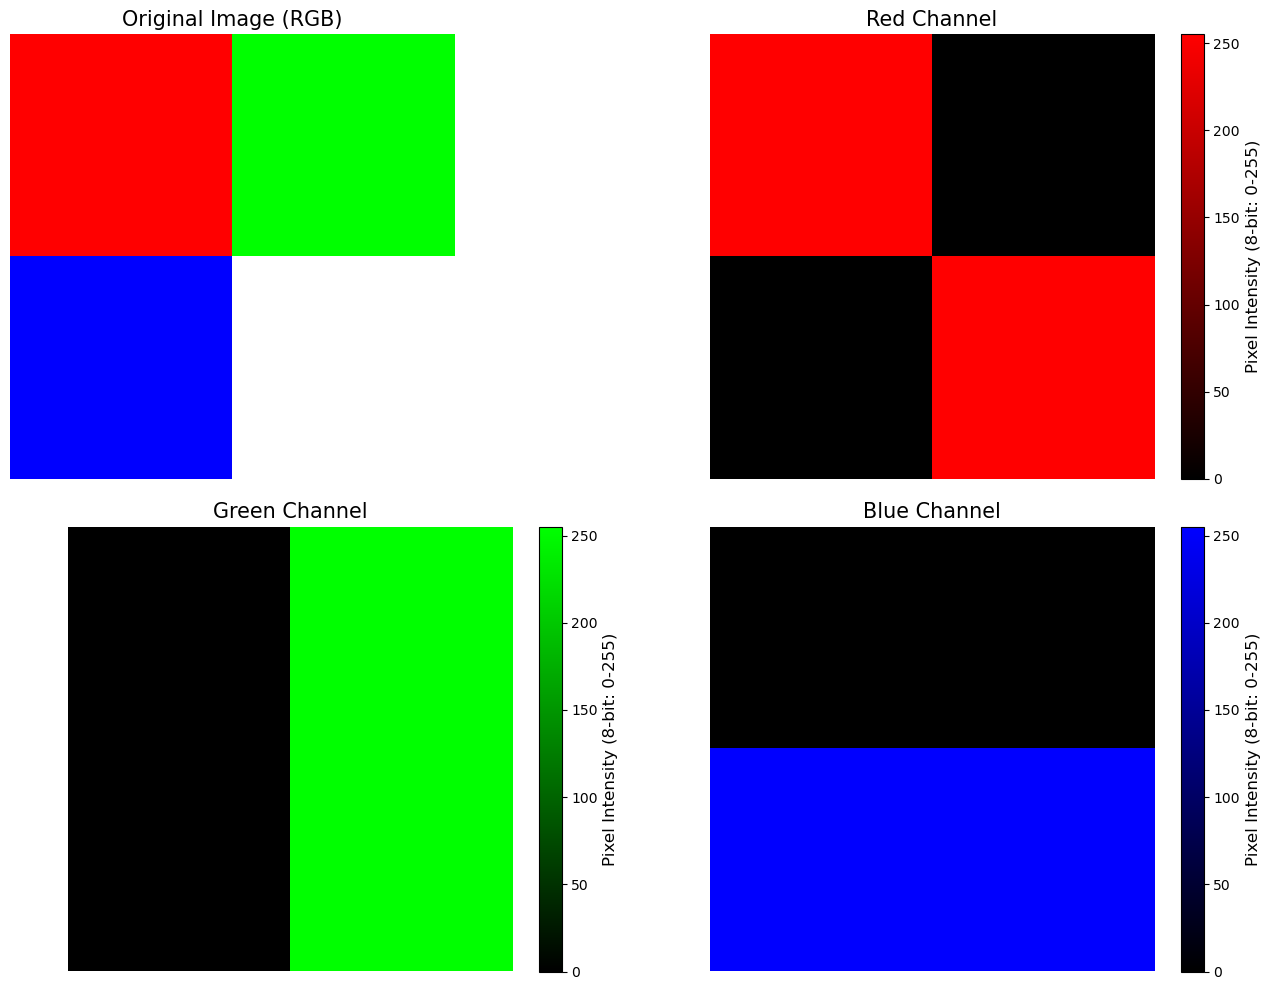

In [23]:
from helpers import visualize_image_and_channels

img = np.array([[[255, 0, 0], [0, 255, 0]],
                [[0, 0, 255], [255, 255, 255]]], dtype=np.uint8)
visualize_image_and_channels(img)

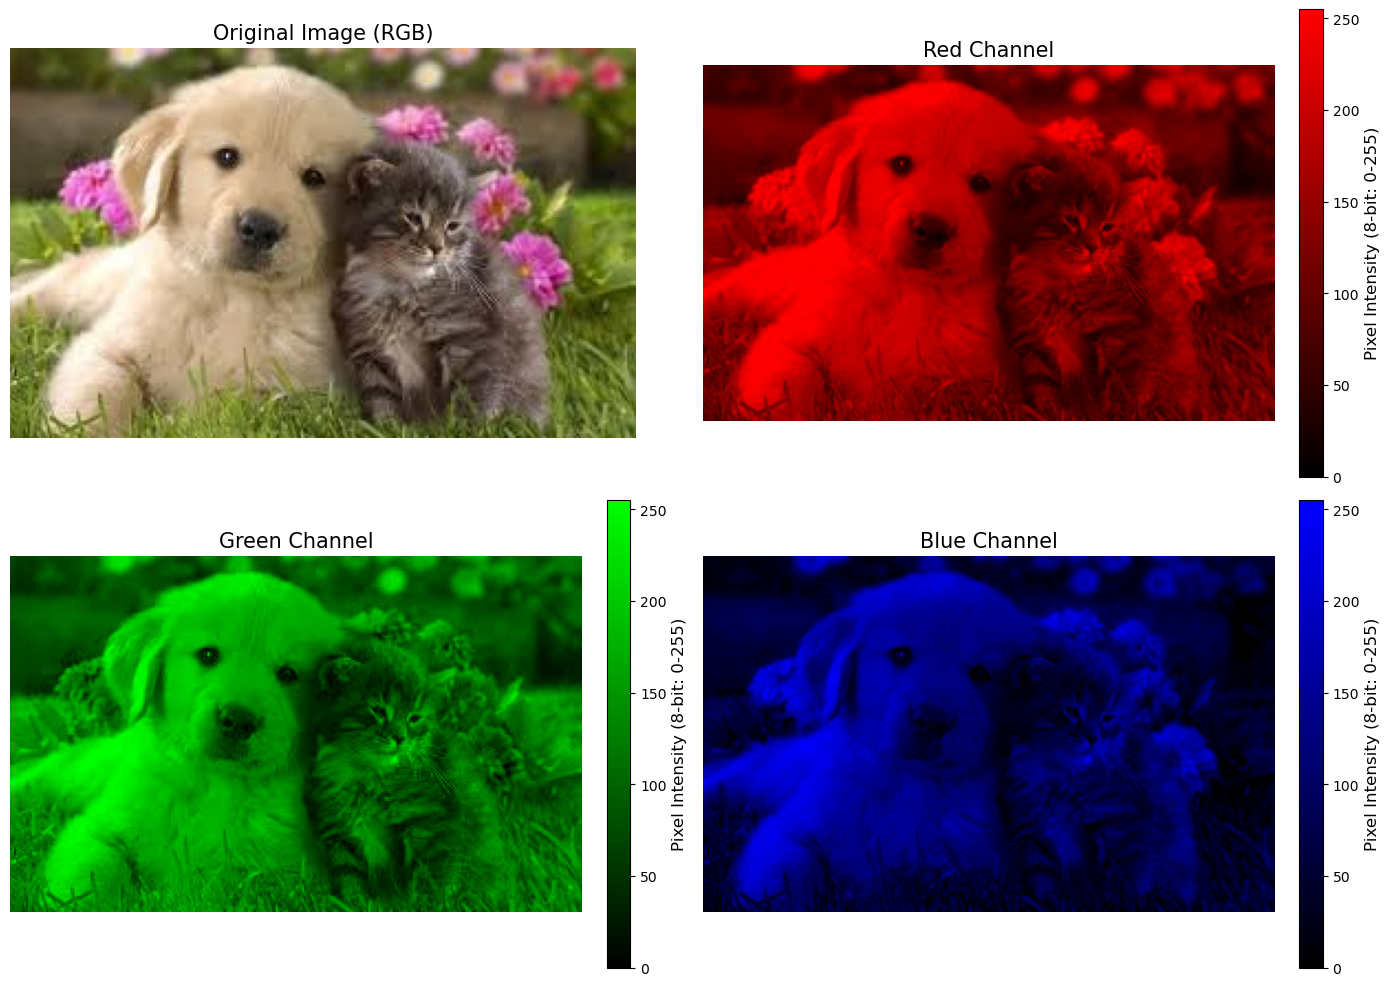

In [24]:
visualize_image_and_channels(img_numpy)

이미지는 배열이기 때문에 slicing으로 원하는 영역만 잘라낼 수 있습니다 (crop)

Sliced image shape: (90, 110, 3)


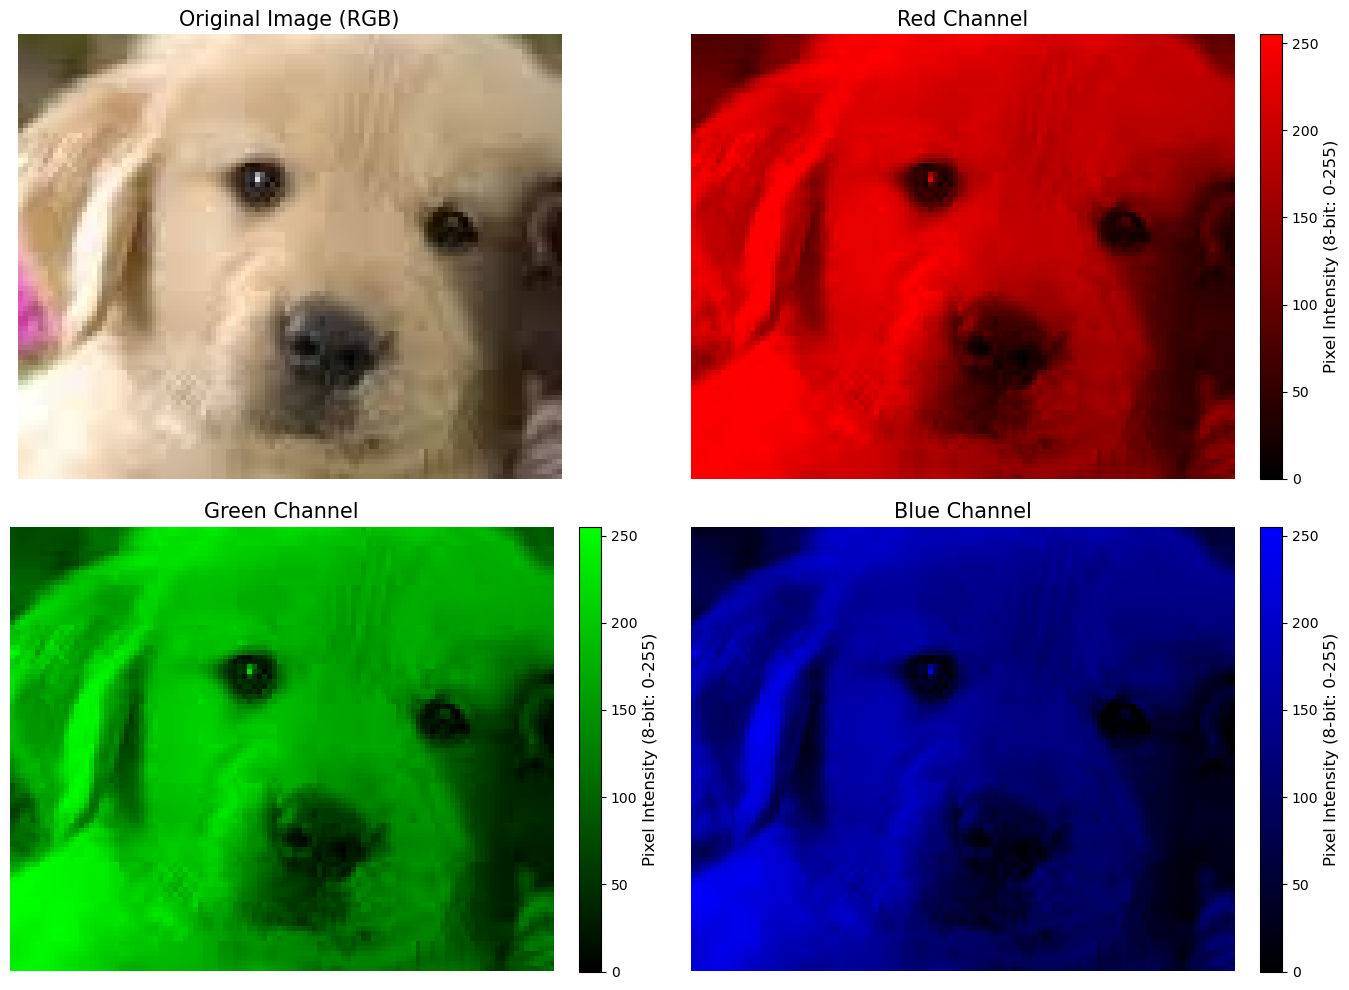

In [25]:
img_sliced = img_numpy[20:110, 50:160, :]
print("Sliced image shape:", img_sliced.shape)
visualize_image_and_channels(img_sliced)

### Dataset과 DataLoader
데이터 관리 모듈의 필요성
- 데이터 전처리 코드는 구조가 복잡하고 지저분해지기 쉬워, 코드의 가독성과 유지보수성을 해치기 쉽습니다.
- 따라서 이상적으로는 **데이터셋 관리하는 코드**와 **모델 학습 코드**가 완전히 분리되는것이 좋습니다
- 이를 통해 코드의 가독성(readability) 재사용성(resuability), 모듈화(modularity)가 크게 향상됩니다

PyTorch는 데이터를 효율적으로 관리하고 학습에 활용할 수 있도록 아래 두 가지 핵심 모듈을 제공합니다:
1. ``torch.utils.data.Dataset``: 한번에 하나의 데이터와 라벨을 읽어옴
2. ``torch.utils.data.DataLoader``: `Dataset` 객체를 받아 mini-batch로 데이터를 묶어주며, shuffle, 병렬 처리 등을 지원함.

`torchvision.datasets`에는 `torch.utils.data.Dataset`를 상속받은 다양한 이미지 데이터셋들이 제공됩니다

이번 실습에서는 handwritten digits 분류를 위한 MNIST 데이터셋을 사용해봅니다

In [26]:
import numpy as np

import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [27]:
def load_MNIST_datasets(data_root_dir):
    train_dataset = datasets.MNIST(
        root=data_root_dir, train=True, download=True, 
        transform=ToTensor() # convert PIL Image to a tensor of shape (C, H, W) and in the range [0.0, 1.0].
    )
    test_dataset = datasets.MNIST(
        root=data_root_dir, train=False, download=True, 
        transform=ToTensor()
    )

    return train_dataset, test_dataset

PyTorch의 `Dataset` 객체는 **시퀀스(Sequence) 컨테이너처럼 동작**합니다.  

즉, `dataset[i]`와 같이 인덱스를 사용하면 i번째 샘플(example)을 가져올 수 있습니다.

- `len(dataset)` : 전체 데이터 개수를 반환합니다.
- `dataset[i]` : `(image_tensor, label)` 형태의 튜플을 반환합니다.

In [28]:
train_dataset, test_dataset = load_MNIST_datasets("/datasets")

print("Training dataset size: ", len(train_dataset))
print("Test dataset size: ", len(test_dataset))

image, label = train_dataset[0]             # dataset[i] returns tuple (image, label)
print("Image shape: ", image.shape)         # grayscale image of shape (1, 28, 28)
print("Label of fisrt example: ", label)    # label is an integer

Training dataset size:  60000
Test dataset size:  10000
Image shape:  torch.Size([1, 28, 28])
Label of fisrt example:  5


In [29]:
def visualize_few_samples(dataset, cols=8, rows=5):
    figure = plt.figure(figsize=(8, 8))
    for i in range(1, cols * rows + 1):
        sample_idx = torch.randint(len(dataset), size=(1,)).item()
        img, label = dataset[sample_idx]
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    plt.show()

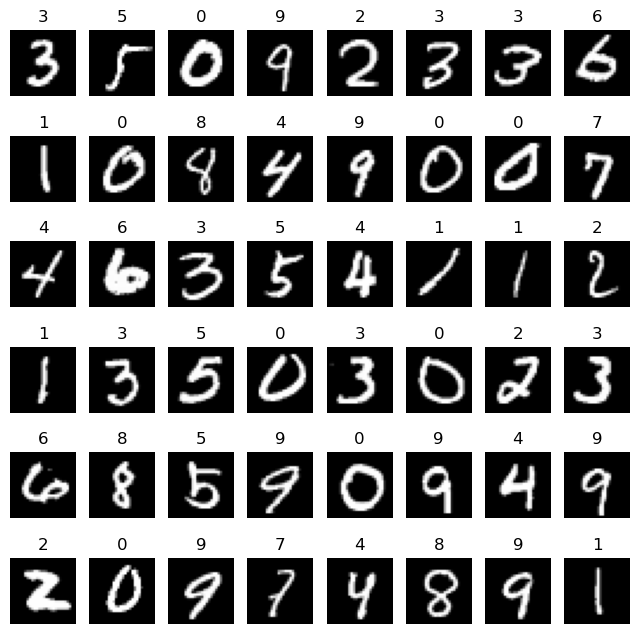

In [30]:
visualize_few_samples(train_dataset, cols = 8, rows = 6)

`Dataset`은 데이터(feature)와 라벨을 한번에 하나씩 가져오는 기능을 제공합니다.

하지만 실제 학습에서는 다음과 같은 추가 기능이 필요합니다.
- 샘플(example)들을 **mini-batch** 단위로 묶어서 가져옴
- 매 epoch마다 데이터를 랜덤하게 섞어주기(shuffle)
- multiprocessing을 이용해 빠르게 데이터를 불러오기

`DataLoader`는 이러한 복잡한 과정을 쉽게 처리해주는 iterable입니다.

- `Dataset`에서 데이터를 가져와 mini-batch 단위로 묶어 제공.
- `shuffle = True`를 통해 매 epoch마다 데이터 순서를 랜덤하게 섞어줌
- `num_workers`를 통해 데이터 전처리를 multiprocessing으로 수행할 수 있다.

In [31]:
batch_size = 64

train_dataloader = DataLoader(dataset = train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
test_dataloader = DataLoader(dataset = test_dataset, batch_size=batch_size, shuffle=False, num_workers=1)
    
for X, y in test_dataloader:    # DataLoader is an iterable
    print(f"Shape of X: {X.shape}")     # shape: [batch_size, C, H, W]
    print(f"Shape of y: {y.shape}, dtype: {y.dtype}")
    break

Shape of X: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]), dtype: torch.int64


## 2. Network 정의하기
이번 실습에서는 `nn.Linear` 레이어를 활용한 간단한 선형 이미지 분류 모델을 구현해보겠습니다.
모델은 MNIST 손글씨 이미지(1 x 28 x 28)를 입력받아, 0부터 9까지 총 10개 숫자 클래스로 분류합니다.

모델 구성요소
- [`nn.Flatten`](https://pytorch.org/docs/stable/generated/torch.nn.Flatten.html#torch.nn.Flatten)
  - 3차원 입력 이미지 (1x28x28) 이미지를 784 크기의 1차원 텐서로 펼쳐줍니다.
  - batch dimension (dim=0)은 그대로 유지합니다.
  - <img src="resources/image_flatten.png" style="width:700px;">
- [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html#torch.nn.Linear)
  - 입력 텐서에 대한 선형 변환 $y=Wx+b$를 수행합니다. Fully Connected Layer와 동일한 개념입니다.
  - `nn.Linear` 레이어는 learnable parameter (weights $W$, bias $b$)를 갖고 있습니다.
- [`nn.Softmax`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html#torch.nn.Softmax): 
  - 모델은 출력인 logit값 ($[-\infty, \infty]$에 분포하는 실수값)을 [0, 1]사이의 확률값으로 변환하기 위해 사용합니다.
  - `dim`를 통해 각 샘플별로 10개의 클래스의 확률 합이 1이 되도록 만들어줍니다.
  - PyTorch에서는 `nn.CrossEntropyLoss()`가 내부적으로 Softmax를 적용해 주기 때문에, 일반적으로 `forward()` 함수에서는 별도로 Softmax를 적용하지 않습니다.

<mark>실습</mark> `LinearNet` 모듈을 완성하세요

In [33]:
class LinearNet(nn.Module):
    def __init__(self, in_dim, out_dim):
        super().__init__()
        ##### YOUR CODE START #####
        # Use nn.Flatten() to flatten the input tensor
        # Use nn.Linear() to define a linear layer
        self.flatten = nn.Flatten()              # 입력을 평탄화
        self.linear = nn.Linear(in_dim, out_dim) # 선형 계층 정의


        ##### YOUR CODE END #####

    def forward(self, x):
        ##### YOUR CODE START #####
        # Write a forward pass of your model
        x = self.flatten(x)     # 입력 텐서 평탄화
        logits = self.linear(x) # 선형 계층 통과
        ##### YOUR CODE END #####
        return logits   # Softamx is not applied here. We will use nn.CrossEntropyLoss() as loss function

`model(input)`의 형태로 실제 입력 데이터를 넣어 forward proprgation이 잘 작동하는지 확인해봅니다

In [34]:
model = LinearNet(in_dim = 1*28*28, out_dim = 10)
print(model)

X = torch.rand(batch_size, 1, 28, 28)   # dummy image data with shape (batch_size, 1, 28, 28)
logits = model(X) 
print("output(logits) shape:", logits.shape)   # logits shape: (batch_size, 10)

LinearNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=784, out_features=10, bias=True)
)
output(logits) shape: torch.Size([64, 10])


- `torch.nn`에 정의된 대부분의 Layer (`nn.Linear`, `nn.Conv2d` 등)는 내부에 학습 가능한 파라미터 (weights, biases) 를 가지고 있습니다.
- 
<mark>실습</mark> 위에서 정의된 `model = LinearNet(in_dim = 1*28*28, out_dim = 10)`의 파라미터 수를 직접 손으로 계산해보세요.
 - Weight $W$의 파라미터 수는 얼마인가요?
 - Bias $b$의 파라미터 수는 얼마인가요?

In [38]:
num_params_W = model.linear.weight.numel()      # TODO: number of parameters in W
num_params_b = model.linear.bias.numel()    # TODO: number of parameters in b

이러한 파라미터들은 `nn.Module`을 상속한 모델 내에 자동으로 등록되며, `parameters()` 또는 `named_parameters()` 메서드를 통해 접근 가능합니다.

아래 코드를 실행하여 계산한 파라미터 수가 맞는지 체크해보세요.

In [39]:
for name, param in model.named_parameters():
    print(f"Layer: {name}\t| Shape: {param.shape}\t| Values : {param[:2]} \n")

Layer: linear.weight	| Shape: torch.Size([10, 784])	| Values : tensor([[-0.0332,  0.0344, -0.0107,  ...,  0.0271, -0.0043, -0.0202],
        [ 0.0244, -0.0336,  0.0014,  ...,  0.0055,  0.0048, -0.0082]],
       grad_fn=<SliceBackward0>) 

Layer: linear.bias	| Shape: torch.Size([10])	| Values : tensor([ 0.0255, -0.0034], grad_fn=<SliceBackward0>) 



In [40]:
total_params = sum(p.numel() for p in model.parameters())
print(f'{total_params:,} total parameters.')

total_trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'{total_trainable_params:,} training parameters.')

assert total_trainable_params == (num_params_W + num_params_b), "❌ 계산한 파라미터 수가 실제 모델과 일치하지 않습니다."

7,850 total parameters.
7,850 training parameters.


## 3. Loss function
Loss 함수는 `nn.CrossEntropyLoss()`를 사용합니다.

``nn.CrossEntropyLoss``는 내부에서 Softmax와 Categorical Cross Entropy 계산을 한번에 수행해주며 아래와 같은 수식으로 주어집니다

### Softmax Function for sample $i$:
$$
\hat{y}^{(i)}_c = \frac{\exp(z^{(i)}_c)}{\sum_{k=1}^C \exp(z^{(i)}_k)}
$$
where:
- $z^{(i)}_c$: logit (pre-softmax score) for class $c$ of sample $i$
- $C$: number of classes

### Categorical Cross Entropy Loss over $m$ samples (mini-batch):
$$
\mathcal{L} = -\frac{1}{m} \sum_{i=1}^m \sum_{c=1}^C y^{(i)}_c \log \hat{y}^{(i)}_c
$$
where:
- $y^{(i)}_c$: one-hot encoded ground truth label for sample $i$
- $\hat{y}^{(i)}_c$: predicted softmax probability for class $c$

In [41]:
model = LinearNet(in_dim = 1*28*28, out_dim = 10)
X = torch.rand(batch_size, 1, 28, 28)   # dummy image data with shape (batch_size, 1, 28, 28)
y = torch.randint(10, (batch_size,))
criterion = nn.CrossEntropyLoss()

logits = model(X) # forward pass
loss = criterion(logits, y)

print("----- Parameters before backward() -----")
for name, param in model.named_parameters():
    print(f"Layer {name}\t| Shape: {param.shape}\t| grad : {param.grad}")

loss.backward()

print("\n----- Parameters after backward() -----")
for name, param in model.named_parameters():
    print(f"Layer {name}\t| Shape: {param.shape}\t| grad : {param.grad.shape}")

----- Parameters before backward() -----
Layer linear.weight	| Shape: torch.Size([10, 784])	| grad : None
Layer linear.bias	| Shape: torch.Size([10])	| grad : None

----- Parameters after backward() -----
Layer linear.weight	| Shape: torch.Size([10, 784])	| grad : torch.Size([10, 784])
Layer linear.bias	| Shape: torch.Size([10])	| grad : torch.Size([10])


## 4. Optimizing your model parameters

딥러닝 학습 기본 흐름

for each iteration (called an **epoch**):
- forward pass: 입력 데이터를 통해 모델의 예측값 (output) 계산
- loss 계산: 예측값과 정답(target)의 차이를 계산해 error(loss)를 측정
- Backward pass: 파라미터에 대한 loss의 미분 계산
- Optimization: 경사하강법(gradient descent)를 통하여 파라미터 업데이트

각 epoch은 다음의 과정으로 구성됩니다.
- Train Loop: 학습 데이터를 이용하여 모델이 최적의 파라미터를 학습
- Evaluation(Validation/Test) Loop - 검증/테스트 데이터셋을 이용하여 모델의 성능을 평가.

<mark>실습</mark> `train_loop`를 완성하세요

In [42]:
def train_loop(model, device, dataloader, criterion, optimizer):
    """
    Train the model for one epoch
    """
    size = len(dataloader.dataset)
    model.train()   # Switch to train mode (activate/deactivate droptout, batchnorm, etc.)

    running_loss = 0.0
    for batch_idx, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)   # copy the data to device (GPU or CPU) where model exists
        
        ##### YOUR CODE START #####
        # Forward propagation and compute loss
        outputs = model(X)
        loss = criterion(outputs, y)

        # Backpropagation and update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Backpropagation and update parameter

        ##### YOUR CODE END #####
    
        running_loss += loss.item()

        if batch_idx % 300 == 0:
            print(f"Train loss: {loss.item():>7f}  [{(batch_idx + 1) * len(X):>5d}/{size:>5d}]")

    avg_train_loss = running_loss / len(dataloader)
    return(avg_train_loss)

In [43]:
device = "cuda:0" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
batch_size = 64
train_dataset, test_dataset = load_MNIST_datasets("/datasets")
train_dataset_subset = torch.utils.data.Subset(train_dataset, range(0, 100))
train_dataloader = DataLoader(dataset= train_dataset_subset, batch_size=batch_size, shuffle=True)

model = LinearNet(in_dim = 1*28*28, out_dim = 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

train_loss = train_loop(model, device, train_dataloader, criterion, optimizer)

Train loss: 2.304362  [   64/  100]


<mark>실습</mark>`evaluation_loop`를 완성하세요

딥러닝 모델 $f$는 입력 $\mathbf{x} \in \mathbb{R}^d$ 를 받아서, 각 클래스에 대한 <b>score (logit)</b>값 $\mathbf{z}$으로 매핑하는 함수입니다:
$$ f: \mathbb{R}^d \to \mathbb{R}^C, \quad \mathbf{z} = f(\mathbf{x}) \in \mathbb{R}^C$$
- $C$: 클래스 개수

이 logit 값을 **softmax 함수**에 통과시키면 각 클래스에 대한 **확률 분포**으로 변환됩니다:

$$
\hat{\mathbf{y}} =   
\begin{bmatrix}  \hat{y}_{1} & \hat{y}_{2} & \cdots & \hat{y}_{C} \end{bmatrix}
 =  \mathrm{softmax}(\mathbf{z}) \in \mathbb{R}^{C}
$$

- 여기서 $\hat{y}_j$는 입력 $\mathbf{x}$가 클래스 $j$에 속할 확률을 예측한 값입니다

최종적으로 우리는 다음과 같이 **가장 확률이 높은 클래스**를 예측값으로 선택합니다:

$$
y_{pred} = \arg\max_j \hat{y}_j
$$

- $ y_{pred} \in \{0, 1, \dots, C-1\}$ 는 예측된 클래스 레이블을 나타냅니다.

<br><br>
실제로는 이러한 작업이 **mini-batch 단위**로 처리됩니다:
$$ \hat{\mathbf{Y}} \in \mathbb{R}^{m \times C} $$

- $m$: 미니배치 크기

힌트: 아래 함수를 사용하세요
- [`nn.Softmax()`](https://pytorch.org/docs/stable/generated/torch.nn.Softmax.html)
- [`torch.argmax()`](https://pytorch.org/docs/stable/generated/torch.argmax.html)


In [46]:
def evaluation_loop(model, device, dataloader, criterion): 
    """
    Evaluate the model
    """
    model.eval() # Set the model to evaluation mode. important for batch normalization and dropout layers

    test_loss, correct = 0.0, 0.0
    with torch.no_grad():   # disable gradient calculation
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            
            ##### YOUR CODE START #####
            # Forward propagation and compute loss
            # calculate y_pred
            outputs = model(X)
            loss = criterion(outputs, y)

            # Accumulate test_loss: sum of loss over mini-batches
            test_loss += loss.item()

            # Accumulate correct: the number of correct predictions
            preds = outputs.argmax(dim=1)  # assuming classification task
            correct += (preds == y).sum().item()


            # accumulate test_loss : sum of loss over mini-batches
            # accumulate correct : the number of correct predictions
    
            ##### YOUR CODE END #####

    avg_test_loss = test_loss / len(dataloader)
    accuracy = correct / len(dataloader.dataset)
    print(f"\nTest Accuracy: {(100*accuracy):>0.1f}%, Avg loss: {avg_test_loss:>8f} \n")

    return(avg_test_loss, accuracy)

In [45]:
test_dataset_subset = torch.utils.data.Subset(test_dataset, range(0, 100))
test_dataloader = DataLoader(dataset= test_dataset_subset, batch_size=batch_size, shuffle=False)

test_loss, test_accuracy = evaluation_loop(model, device, test_dataloader, criterion)


Test Accuracy: 10.0%, Avg loss: 2.293725 



## 5. 학습 및 평가
이제 실제로 모델 학습을 수행해보겠습니다.  
학습을 진행하기 위해서는 **하이퍼파라미터(Hyperparameters)** 를 설정해 주어야 합니다.

- 하이퍼파라미터는 모델이 학습(Optimization)과정을 통해 자동으로 학습하는 파라미터(Parameter)와 달리, 사용자가 사전에 직접 설정해야 하는 값을 의미합니다.
- 하이퍼파라미터는 **모델 학습 과정 전반을 제어하는 역할을 하며**으로, 학습 속도, 성능 등 모델의 학습 과정에 **큰 영향**을 미칩니다.
- 하이퍼파라미터는 데이터나 모델 구조에 따라 최적값이 달라질 수 있기 때문에, <b>사용자가 실험과 검증을 반복하며 최적값을 찾아가는 과정(hyperparameter tuning)</b>이 필요합니다.

| 하이퍼파라미터      | 설명 |
|--------------------|------|
| **Number of Epochs** | 데이터셋 전체를 모델이 몇 번 반복해서 학습할 것인지 지정 |
| **Batch Size**      | 학습할 때 한 번에 가져오는 데이터의 개수 (mini-batch 크기) |
| **Learning Rate**   | 모델 파라미터를 얼마나 크게 업데이트할지 결정 (학습 속도에 영향을 줌) |

Illustration: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="resources/learning_rate.gif" style="width:400;height:400;"> <img src="resources/learning_rate_bad.gif" style="width:400;height:400;">


<mark>참고</mark> 학습 과정에서 `model`과 데이터 (`X`, `y`)가 동일한 device에 있어야 연산이 가능합니다.

In [47]:
def main():
    # Hyperparameters
    batch_size = 64     # Use ~ 530MB of VRAM
    learning_rate = 1e-3
    num_epochs = 40

    # training setting
    in_dim, out_dim = 28*28, 10
    save_model = True
    
    device = "cuda:0" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
    print(f"Using {device} device")


    train_dataset, test_dataset = load_MNIST_datasets("/datasets")
    
    train_dataloader = DataLoader(dataset= train_dataset, batch_size=batch_size, shuffle=True)
    test_dataloader = DataLoader(dataset= test_dataset, batch_size=batch_size, shuffle=False)


    model = LinearNet(in_dim, out_dim).to(device)   # move model to device (GPU)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

    train_loss_list, test_loss_list, test_accuracy_list = [], [], []
    for t in range(num_epochs):
        print(f"Epoch {t+1}\n-------------------------------")
        train_loss = train_loop(model, device, train_dataloader, criterion, optimizer)
        test_loss, test_accuracy = evaluation_loop(model, device, test_dataloader, criterion)

        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        test_accuracy_list.append(test_accuracy)

    if save_model:
        torch.save(model.state_dict(), "model_checkpoint.pth")
        print("Saved Model State to model.pth")

    return train_loss_list, test_loss_list, test_accuracy_list

In [48]:
train_loss_list, test_loss_list, test_accuracy_list = main()

Using cuda:0 device
Epoch 1
-------------------------------
Train loss: 2.302419  [   64/60000]
Train loss: 2.042224  [19264/60000]
Train loss: 1.769324  [38464/60000]
Train loss: 1.658587  [57664/60000]

Test Accuracy: 75.2%, Avg loss: 1.581339 

Epoch 2
-------------------------------
Train loss: 1.610649  [   64/60000]
Train loss: 1.325331  [19264/60000]
Train loss: 1.383477  [38464/60000]
Train loss: 1.230333  [57664/60000]

Test Accuracy: 80.1%, Avg loss: 1.213618 

Epoch 3
-------------------------------
Train loss: 1.255784  [   64/60000]
Train loss: 1.185579  [19264/60000]
Train loss: 1.045595  [38464/60000]
Train loss: 0.894093  [57664/60000]

Test Accuracy: 82.1%, Avg loss: 1.010951 

Epoch 4
-------------------------------
Train loss: 0.961699  [   64/60000]
Train loss: 0.900926  [19264/60000]
Train loss: 0.889014  [38464/60000]
Train loss: 0.990811  [57664/60000]

Test Accuracy: 83.5%, Avg loss: 0.885679 

Epoch 5
-------------------------------
Train loss: 0.985134  [   64

학습 결과를 시각화해보겠습니다.

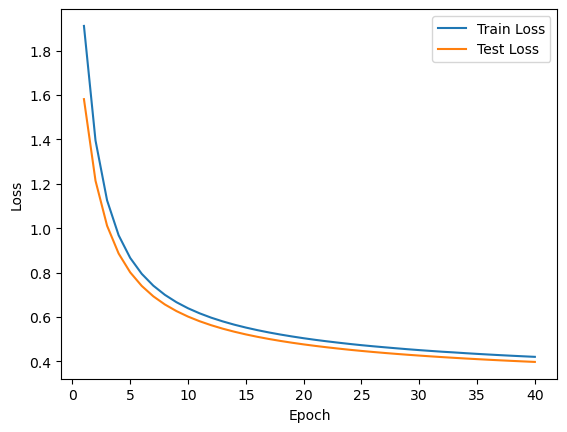

In [49]:
epochs_range = [i for i in range(1, len(train_loss_list) + 1)]
plt.plot(epochs_range, train_loss_list, label='Train Loss')
plt.plot(epochs_range, test_loss_list, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.show ()


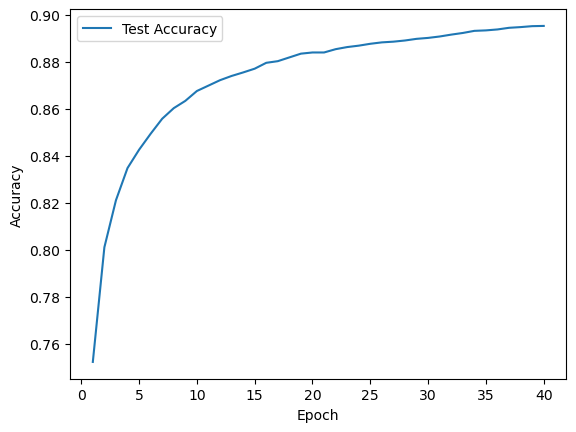

In [50]:
epochs_range = [i for i in range(1, len(train_loss_list) + 1)]
plt.plot(epochs_range, test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.show ()

In [51]:
model = LinearNet(28*28, 10)
model.load_state_dict(torch.load("model_checkpoint.pth"))

<All keys matched successfully>

Predicted: "tensor([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 3, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 2])"
Actual: tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5,
        4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2,
        4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3])


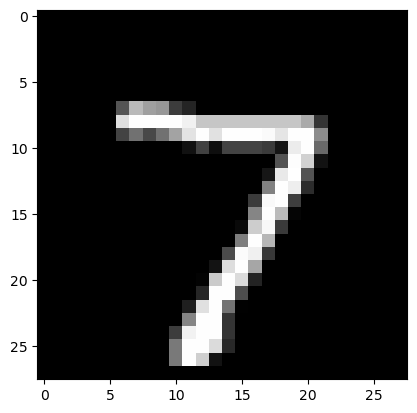

Label: 7
Predicted label: 7


In [52]:
model.eval()

with torch.no_grad():
    X, y = next(iter(test_dataloader))
    logits = model(X)
    y_pred = logits.argmax(dim = 1)

    print(f'Predicted: "{y_pred}"')
    print(f"Actual: {y}")

    # display single example
    img = X[0].squeeze()
    label = y[0]
    pred_label = y_pred[0]
    plt.imshow(img, cmap="gray")
    plt.show()
    print(f"Label: {label}")
    print(f"Predicted label: {pred_label}")

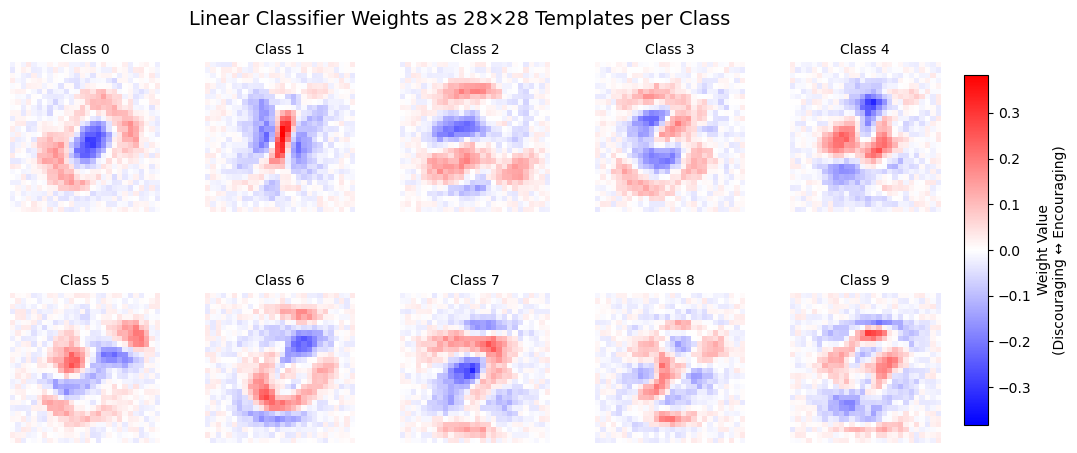

In [53]:
def visualize_weights(model, image_shape=(28, 28)):
    weights = model.linear.weight.data.cpu()  # shape: (C, 784)
    num_classes = weights.shape[0]
    
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    axes = axes.flatten()

    vmax = torch.max(torch.abs(weights)).item()  # For symmetric colormap

    for i, ax in enumerate(axes):
        if i < num_classes:
            weight_img = weights[i].reshape(image_shape)
            im = ax.imshow(weight_img, cmap='bwr', vmin=-vmax, vmax=vmax)
            ax.set_title(f"Class {i}", fontsize=10)
        else:
            ax.axis('off')  # Hide unused subplots
        ax.axis('off')

    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax)
    cbar.set_label('Weight Value\n(Discouraging ↔ Encouraging)', fontsize=10)

    plt.suptitle("Linear Classifier Weights as 28×28 Templates per Class", fontsize=14)
    plt.subplots_adjust(wspace=0.3, hspace=0.5, right=0.9)
    plt.show()
    
visualize_weights(model)

### Lab을 마무리 짓기 전 저장된 checkpoint를 지워 github 업로드를 방지합니다.

In [54]:
import os
os.remove('model_checkpoint.pth')